<a href="https://colab.research.google.com/github/Adhini99/BRITISH-AIRWAYS-DATA-SCIENCE-TASK/blob/main/british_airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Web scraping and analysis**

This Jupyter notebook includes code for web scraping.A package called BeautifulSoup is used to collect the data from the web.After collecting the data,it is saved into a local .csv file after which the analysis is done.

Scraping data from Skytrax
[https://www.airlinequality.com] there is a lot of data in this website. For this task, we are only using the reviews related to British Airways and the Airline itself.

link: [https://www.airlinequality.com/airline-reviews/british-airways].

Now,Python and BeautifulSoup is used to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
pip install pandas

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,✅ Trip Verified | Straightforward check in T...
1,Not Verified | I am beyond upset and disgusted...
2,✅ Trip Verified | I purchased round trip dir...
3,Not Verified | I booked two business class sea...
4,Not Verified | Although all four flights were ...
5,✅ Trip Verified | Flight changed just one da...
6,Not Verified | Delayed flight 1 hour. Arbitrar...
7,Not Verified | Flown with BA four times. As an...
8,✅ Trip Verified | You may never see your ref...
9,Not Verified | Cargo service: that's how I fel...


In [ ]:
import os
import pandas as pd

# ... your existing code ...

# Create the directory if it doesn't exist
if not os.path.exists("include"):
    os.makedirs("include")

df.to_csv("include/BA_reviews.csv")

The loops above collected 1000 reviews by iterating through the paginated pages on the website.

Next,Clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant

In [ ]:
#Coverting the list data into a dataframe
import re
df = pd.DataFrame(reviews)
df.columns = ["REVIEW"]

#Removing unwanted text(first text preprocessing)
df.replace(re.compile(r'✅ Trip Verified \|'),'', inplace=True)
df

,REVIEW
0,Straightforward check in T5. New site for c...
1,Not Verified | I am beyond upset and disgusted...
2,I purchased round trip direct flight busine...
3,Not Verified | I booked two business class sea...
4,Not Verified | Although all four flights were ...
...,...
995,Hamburg to Abu Dhabi via London Heathrow. Ini...
996,New York to Glasgow via London. A routine and...
997,London Heathrow to New York. The staff went a...
998,Gatwick to Bermuda. Boarded very quickly and...


**Sentiment Analysis and Data Visualization**

Once the dataset is ready,sentiment intensity is measured.If the result is below 0 then its a negative review ,elseif the result is above 0 then it is a positive review,else it is a neutral review.

Later Data visualization is done using Matplotlib.

For better understanding, Topic Modelling,Sentiment Analysis and wordclouds are plotted and shown as a visualization.


In [ ]:
from nltk.sentiment import vader
import nltk
import matplotlib.pyplot as plt
import requests
from collections import Counter
import pandas as pd

nltk.download('vader_lexicon')
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
df['SENTIMENT'] = df['REVIEW'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
df

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,REVIEW,SENTIMENT
0,Straightforward check in T5. New site for c...,0.8793
1,Not Verified | I am beyond upset and disgusted...,-0.9942
2,I purchased round trip direct flight busine...,-0.8155
3,Not Verified | I booked two business class sea...,-0.4019
4,Not Verified | Although all four flights were ...,0.9039
...,...,...
995,Hamburg to Abu Dhabi via London Heathrow. Ini...,-0.2964
996,New York to Glasgow via London. A routine and...,0.9942
997,London Heathrow to New York. The staff went a...,0.9788
998,Gatwick to Bermuda. Boarded very quickly and...,0.9802


from matplotlib import pyplot as plt
df['SENTIMENT'].plot(kind='hist', bins=20, title='SENTIMENT')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['SENTIMENT'].plot(kind='line', figsize=(8, 4), title='SENTIMENT')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df['SENTIMENT_TYPE'] = df['SENTIMENT'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
df


,REVIEW,SENTIMENT,SENTIMENT_TYPE
0,Straightforward check in T5. New site for c...,0.8793,positive
1,Not Verified | I am beyond upset and disgusted...,-0.9942,negative
2,I purchased round trip direct flight busine...,-0.8155,negative
3,Not Verified | I booked two business class sea...,-0.4019,negative
4,Not Verified | Although all four flights were ...,0.9039,positive
...,...,...,...
995,Hamburg to Abu Dhabi via London Heathrow. Ini...,-0.2964,negative
996,New York to Glasgow via London. A routine and...,0.9942,positive
997,London Heathrow to New York. The staff went a...,0.9788,positive
998,Gatwick to Bermuda. Boarded very quickly and...,0.9802,positive


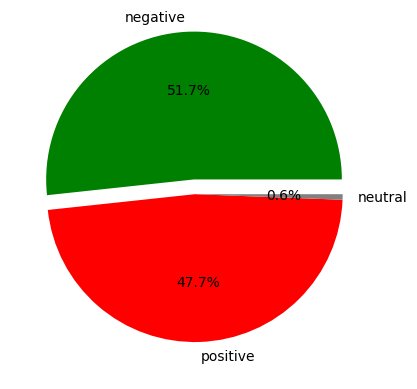

In [ ]:
sentiment_type_percentages = df['SENTIMENT_TYPE'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index,
    colors=['green', 'red', 'grey'],
    explode=[0.1, 0, 0],
    autopct='%1.1f%%'
    )

plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


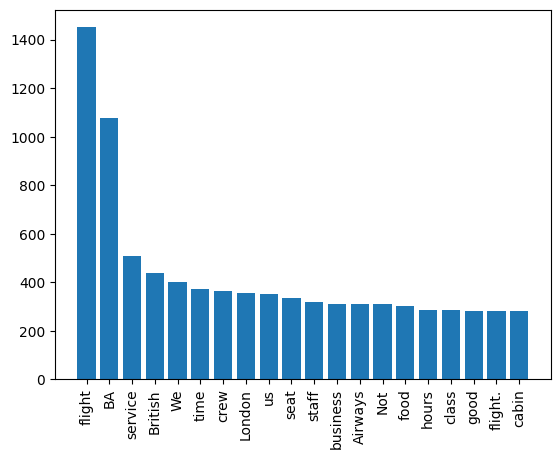

In [ ]:
!pip install nltk
import nltk

# Download the stopwords resource
nltk.download('stopwords')

reviews = df['REVIEW']

# Convert the reviews to a list of words
words = []
for review in reviews:
    words.extend(review.split())

# Filter out the stubborn stop words that don't want to disappear
stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]

# Get the top 20 most used key words
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Filter out the stop words
filtered_words = [
    (word, count) for word, count in top_20_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]

# Get the labels and values for the histogram
labels, values = zip(*top_20_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)

#Display the plot
plt.show()

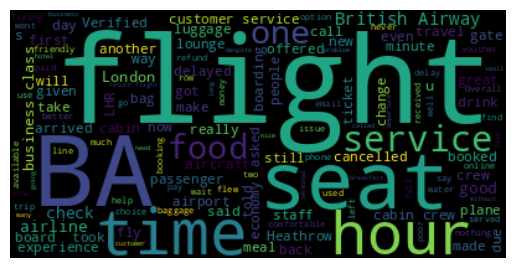

In [ ]:
# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Create the wordcloud
wordcloud = WordCloud(random_state=42).generate(' '.join(df['REVIEW']))

# Show the word cloud
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

## **Predicting customer buying behaviour**

Predictive modeling of customer bookings.

**Exploratory data analysis**
*Explore the data in order to better understand what we have and the statistical properties of the dataset.*

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/british airways/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The .head() method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The .info() method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values.

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The .describe() method gives us a summary of descriptive statistics over the entire dataset.

In [ ]:
X= df.drop('booking_complete',axis=1)
y= df.booking_complete

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

X.dtypes

,0
num_passengers,int64
sales_channel,int64
trip_type,int64
purchase_lead,int64
length_of_stay,int64
flight_hour,int64
flight_day,int64
route,int64
booking_origin,int64
wants_extra_baggage,int64


In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores

,MI Scores
route,0.050809
booking_origin,0.046617
flight_duration,0.019414
length_of_stay,0.007743
wants_extra_baggage,0.006650
num_passengers,0.005061
purchase_lead,0.002783
flight_day,0.002476
sales_channel,0.002115
wants_in_flight_meals,0.002025


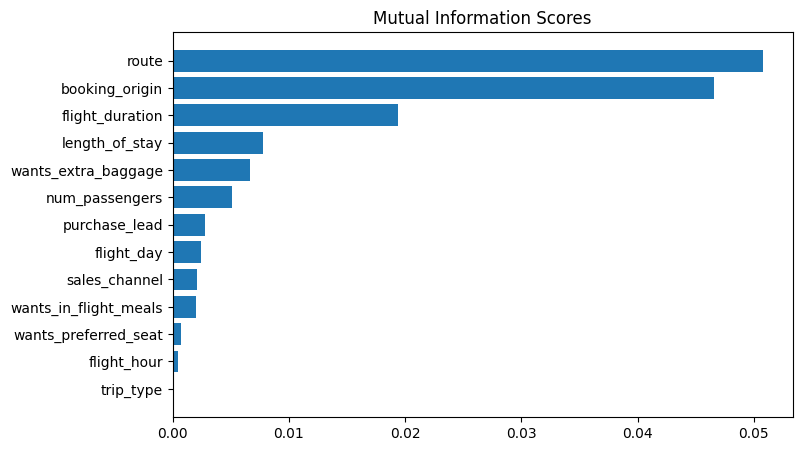

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

**Random forest classifier**

Random forest classifier algorithm is used with consideration of all feature.Random forest is used because this model gives high accuracy output for this kind of projects

One more alternative for random forest is XGB Classifier which gives almost equal accuracy percentage.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  84.84
AUC score:  0.5527766076821664
